# **Decision Trees on Drug data & Breast Cancer data**

## **Table of Contents**

drug200 data
* [Dataset Information](#Dataset)
* [Data Exploration (EDA)](#EDA)
* [Method Development: Setting up the Decision Tree](#Method)
* [Model Evaluation](#Evaluation)
* [Visualization of Decisison Tree](#Visualization)

Breast Cancer Coimbra Data Set 
* [Dataset Information](#DatasetInformation)
* [Method Development: Setting up the Decision Tree](#DTClassification)
* [Model Evaluation](#Metrics)


**Importing the required library packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **1. About the dataset: drug200 data**<a name="Dataset"></a>

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.  

Part of the job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

It is a sample of binary classifier, and the training part of the dataset can be used to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

### **Downloading the Data**
To download the data, use !wget to download it from IBM Object Storage.

In [2]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2022-04-18 16:44:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2022-04-18 16:44:08 (760 MB/s) - ‘drug200.csv’ saved [6027/6027]



### **Load the drug200 data**

In [3]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
print(df.size)
print(df.shape)
print(df.ndim)

1200
(200, 6)
2


### **Data Preprocessing**

In [5]:
# X = df.iloc[:,:-1]  
# X = df.drop('Drug',axis=1)
# X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']] .values  #.astype(float)
X = df.loc[:, df.columns != 'Drug'].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Some features in this dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not handle categorical variables. To convert these features to numerical values, pandas.get_dummies() can be used to convert categorical variable into dummy/indicator variables.

In [6]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:, 1] = le_sex.fit_transform(X[:, 1])
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:, 2] = le_BP.fit_transform(X[:, 2])
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:, 3] = le_Chol.fit_transform(X[:, 3])
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
y = df["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## **Method Development: Setting up the Decision Tree**<a name="Method"></a>

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.ndim)
print(y_train.ndim)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
1
(140, 5)
(140,)
(60, 5)
(60,)


Create an instance of the DecisionTreeClassifier called drugTree. Inside of the classifier, specify criterion="entropy" so that the information gain of each node can be seen.

In [9]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTclassifier.fit(X_train,y_train) # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
y_pred_DT = DTclassifier.predict(X_test)
y_pred_DT

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

## **Model Evaluation - Decision Tree Classification**<a name="Evaluation"></a>
KEY PERFORMANCE INDICATORS (KPI): Generating the Confusion Matrix and Classification report

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred_DT == y_test).sum() / len(y_test)
print('Accuracy of Decision Tree Model calculated manually is ', accuracy.round(2))
print('Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DT))
print('\n', '\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DT))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DT))

Accuracy of Decision Tree Model calculated manually is  0.98
Accuracy of Decision Tree Model is  0.9833333333333333

 
 Confusion Matrix of Decision Tree Model:
 [[ 7  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 20  1]
 [ 0  0  0  0 22]]

 
 Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



## **Visualization of Decision Tree**<a name="Visualization"></a>

In [12]:
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [13]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

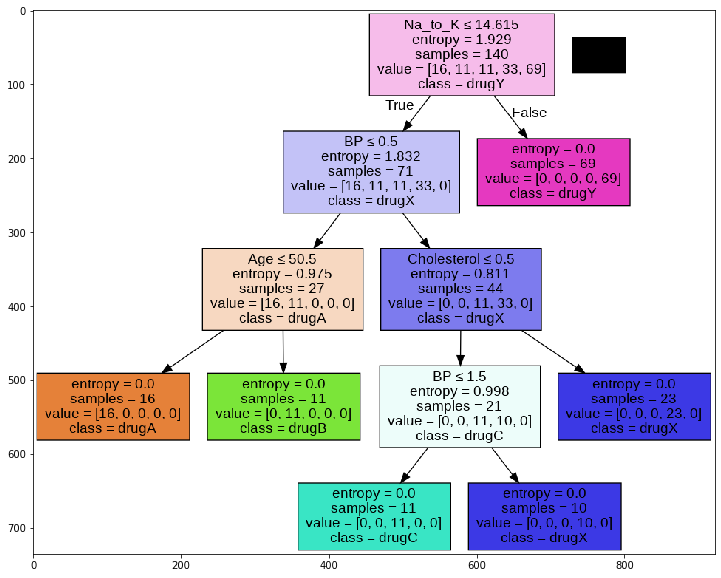

In [14]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(DTclassifier,
                         feature_names=featureNames, 
                         out_file=dot_data, 
                         class_names= np.unique(y_train), 
                         filled=True,  
                         special_characters=True,
                         rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(15, 10))
plt.imshow(img,interpolation='nearest');

## **2. Dataset Information: Breast Cancer Coimbra Data Set**<a name="DatasetInformation"></a>
The [Breast Cancer Coimbra Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra) is obtained from UCI Machine Learning Repository. More information is gathered from the original [research paper](https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1) published in 2018.

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.

The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.

Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.

**Attribute Information:**

**Quantitative Attributes:**
*   Age (years)
*   BMI (kg/m2)
*   Glucose (mg/dL)
*   Insulin (µU/mL)
*   Homeostasis Model Assessment (HOMA) index to evaluate insulin resistance
*   Leptin (ng/mL)
*   Adiponectin (µg/mL)
*   Resistin (ng/mL)
*   Monocyte chemoattractant protein-1 (MCP-1(pg/dL)) 

**Labels:**

1=Healthy controls

2=Patients


**Load the dataset**

In [15]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


### **Data Preprocessing**

In [16]:
# X = df.iloc[:,:-1]  
# X = df.drop('Drug',axis=1)
# X = df[['Age', 'BMI', Glucose', 'Insulin', 'HOMA','Leptin', 'Adiponectin', 'Resistin', 'MCP.1']] .values  #.astype(float)
X = df.loc[:, df.columns != 'Classification'].values
X[0:5]

array([[4.80000000e+01, 2.35000000e+01, 7.00000000e+01, 2.70700000e+00,
        4.67408667e-01, 8.80710000e+00, 9.70240000e+00, 7.99585000e+00,
        4.17114000e+02],
       [8.30000000e+01, 2.06904945e+01, 9.20000000e+01, 3.11500000e+00,
        7.06897333e-01, 8.84380000e+00, 5.42928500e+00, 4.06405000e+00,
        4.68786000e+02],
       [8.20000000e+01, 2.31246704e+01, 9.10000000e+01, 4.49800000e+00,
        1.00965107e+00, 1.79393000e+01, 2.24320400e+01, 9.27715000e+00,
        5.54697000e+02],
       [6.80000000e+01, 2.13675214e+01, 7.70000000e+01, 3.22600000e+00,
        6.12724933e-01, 9.88270000e+00, 7.16956000e+00, 1.27660000e+01,
        9.28220000e+02],
       [8.60000000e+01, 2.11111111e+01, 9.20000000e+01, 3.54900000e+00,
        8.05386400e-01, 6.69940000e+00, 4.81924000e+00, 1.05763500e+01,
        7.73920000e+02]])

In [17]:
y = df["Classification"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

## **Model Development: Decision Tree Classification** <a name="DTClassification"></a>

### **Train Test Split**
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit. It is important that the model developed have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. One way to improve out-of-sample accuracy is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive to train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that the outcome of each data point in this dataset is known, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.


Use train_test_split to split the data into a training set and a testing set.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.ndim)
print(y_train.ndim)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
1
(81, 9)
(81,)
(35, 9)
(35,)


In [19]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTclassifier.fit(X_train,y_train) # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## **Model Evaluation - Decision Tree Classification**<a name="Metrics"></a>
KEY PERFORMANCE INDICATORS (KPI): Generating the Confusion Matrix and Classification report

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
y_pred_DT = DTclassifier.predict(X_test)
accuracy = (y_pred_DT == y_test).sum() / len(y_test)
print('Accuracy of Decision Tree Model calculated manually is ', accuracy.round(2))
print('Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DT))
print('\n', '\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DT))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DT))

Accuracy of Decision Tree Model calculated manually is  0.66
Accuracy of Decision Tree Model is  0.6571428571428571

 
 Confusion Matrix of Decision Tree Model:
 [[13  2]
 [10 10]]

 
 Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           1       0.57      0.87      0.68        15
           2       0.83      0.50      0.62        20

    accuracy                           0.66        35
   macro avg       0.70      0.68      0.65        35
weighted avg       0.72      0.66      0.65        35



## **Visualization of Decision Tree**<a name="Visualize"></a>

In [21]:
y_train = y_train.astype('string')

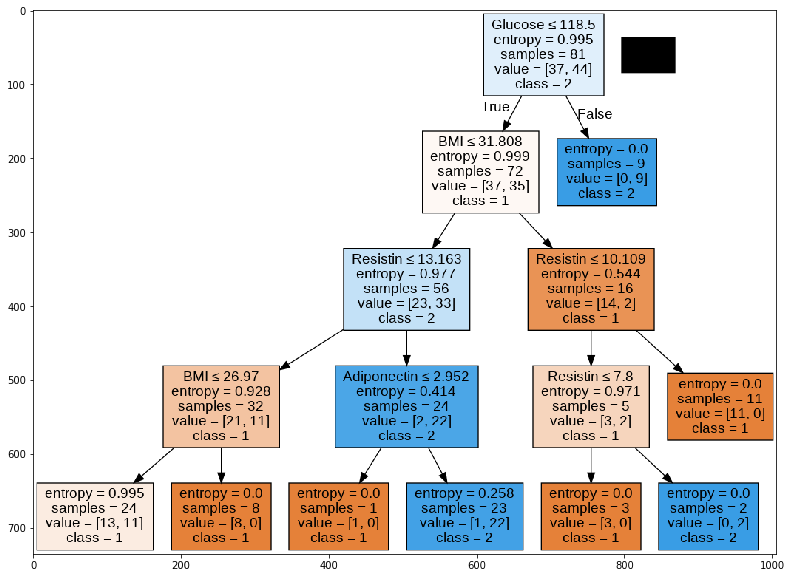

In [22]:
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:9]
targetNames = df["Classification"].unique().tolist()
out=tree.export_graphviz(DTclassifier,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(15, 10))
plt.imshow(img,interpolation='nearest');